In [70]:
import backtrader as bt

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import plotly.express as px
from numpy import loadtxt
from sklearn.metrics import f1_score,recall_score
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel,TFRobertaModel
from transformers import AutoTokenizer
from transformers import AutoConfig, AutoModel,TFAutoModel
from transformers import AutoTokenizer,BertTokenizer
import plotly.graph_objects as go
import datetime
import matplotlib.dates as dates
from matplotlib.dates import date2num

In [72]:
from autoviz.AutoViz_Class import AutoViz_Class

In [73]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

In [5]:
try:
    # Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [6]:
df=pd.read_csv('business_news.csv')

In [7]:
df.head(2)

Date              Category  \
0  06/12/2020  Business & Economics   
1  06/12/2020  Business & Economics   

                                                       Headline  
0   عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی معاونت کرے گا  
1  مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد میں 23 فیصد کمی

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79057 entries, 0 to 220239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      79057 non-null  datetime64[ns]
 1   Category  79057 non-null  object        
 2   Headline  79057 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.4+ MB


In [256]:
df['Category'].value_counts()

Business & Economics    79057
Name: Category, dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
stock_data=pd.read_csv('Stock Exchange KSE 100.csv')
df_stocks=stock_data.copy()

In [11]:
df_stocks['Date']=pd.to_datetime(df_stocks['Date'])
df_stocks.sort_values(by='Date', ascending = True, inplace=True)
df_stocks.reset_index(drop=True,inplace=True)

In [12]:
stock_data['Close'].plot(figsize=(15,5))

<AxesSubplot:>

In [241]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3221 non-null   datetime64[ns]
 1   Open    3221 non-null   float64       
 2   High    3221 non-null   float64       
 3   Low     3221 non-null   float64       
 4   Close   3221 non-null   float64       
 5   Change  3221 non-null   float64       
 6   Volume  3221 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 176.3 KB


In [244]:
fig = go.Figure(data=[go.Candlestick(x=stock_data['Date'],
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False,title='Karachi Stock Historical Data')
fig.update_layout(yaxis_title='Price',xaxis_title='Date')

fig.show()

## Load Pretrained Models

model_preroberta =TFAutoModel.from_pretrained("urduhack/roberta-urdu-small",from_pt=True)
model_prembert = TFBertModel.from_pretrained("bert-base-multilingual-cased")

In [14]:
tokenizer_roberta = AutoTokenizer.from_pretrained("urduhack/roberta-urdu-small")

In [15]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [16]:
max_length=40

In [17]:
def prep_data(text):
    tokens=tokenizer_roberta.batch_encode_plus(text,max_length=max_length,
                                truncation=True,padding='max_length',
                                return_token_type_ids=False,
                                add_special_tokens=True, 
                                return_tensors='tf')
    return{
        'input_ids':tf.cast(tokens['input_ids'],tf.int32),
        'attention_masks':tf.cast(tokens['attention_mask'],tf.int32)
    }

In [18]:
def prep_data1(text):
    tokens=bert_tokenizer.batch_encode_plus(text,max_length=max_length,
                                truncation=True,padding='max_length',
                                return_token_type_ids=False,
                                add_special_tokens=True,       
                                return_tensors='tf')
    return{
        'input_ids':tf.cast(tokens['input_ids'],tf.int32),
        'attention_masks':tf.cast(tokens['attention_mask'],tf.int32)
    }

## Prepare Data

In [19]:
text_data=df['Headline'].tolist()

In [20]:
text_roberta=prep_data(text_data)

In [21]:
text_bert=prep_data1(text_data)

### Predictions for Labels = Positive:2 ,Neutral:1,Negative:0

## Trained Models

In [22]:
Roberta_model_sampled = tf.keras.models.load_model('Roberta_sampled/Roberta_sampled.h5',
                                                   custom_objects={'TFRobertaModel': TFRobertaModel})

In [23]:
Roberta_model_sampled.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 40)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  125978112  ['input_ids[0][0]',              
 el)                            thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                          

In [24]:
Bert_model_sampled = tf.keras.models.load_model('Bert_model/Bert_model.h5',
                                                   custom_objects={'TFBertModel': TFBertModel})

In [25]:
Bert_model_sampled.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 40)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                          

## Predict

### Roberta-Urdu & Bert-Multilingual

In [26]:
results=Roberta_model_sampled.predict(text_roberta)

2471/2471 [==============================] - 2638s 1s/step


In [27]:
results_1=Bert_model_sampled.predict(text_bert)

2471/2471 [==============================] - 2388s 965ms/step


In [28]:
predicted = np.argmax(results, axis=-1)
predicted=predicted.reshape(-1,1)
df_predicted=pd.DataFrame(predicted, columns = ['sentiments'])
df_output=pd.concat([df.reset_index(drop=True), df_predicted],axis=1)
df_output.head(10)

Date              Category  \
0 2020-06-12  Business & Economics   
1 2020-06-12  Business & Economics   
2 2020-05-12  Business & Economics   
3 2020-05-12  Business & Economics   
4 2020-05-12  Business & Economics   
5 2020-04-12  Business & Economics   
6 2020-04-12  Business & Economics   
7 2020-03-12  Business & Economics   
8 2020-03-12  Business & Economics   
9 2020-02-12  Business & Economics   

                                                                     Headline  \
0                 عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی معاونت کرے گا   
1                مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد میں 23 فیصد کمی   
2                  جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ کاری کی دعوت   
3                            برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد   
4         کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانونی تقاضے تعطل کا شکار   
5  کھانے پینے کی اشیا کی قیمتیں سال کی بلند ترین سطح پر پہنچ گئیں اقوام متحدہ   
6       صنعتی صارفین کیلئے بجلی کے پیک ور ٹیرف اسکیم کا خاتمہ اور سبسڈی منظور   
7               پاکستان میں موبائل کمپنیاں مقامی طور پر اسمبلنگ کی جانب گامزن   
8  گنے کی بروقت کٹائی سے چینی کی قیمت کم ہو کر 85 روپے فی کلوگرام تک پہنچ گئی   
9                                 نومبر میں مہنگائی معمولی کمی سے 83 فیصد رہی   

   sentiments  
0           2  
1           2  
2           2  
3           2  
4           0  
5           0  
6           1  
7           2  
8           0  
9           2

In [29]:
predicted_1 = np.argmax(results_1, axis=-1)
predicted_1=predicted_1.reshape(-1,1)
df_predicted_1=pd.DataFrame(predicted_1, columns = ['sentiments'])
df_output_1=pd.concat([df.reset_index(drop=True), df_predicted_1],axis=1)
df_output_1.head(10)

Date              Category  \
0 2020-06-12  Business & Economics   
1 2020-06-12  Business & Economics   
2 2020-05-12  Business & Economics   
3 2020-05-12  Business & Economics   
4 2020-05-12  Business & Economics   
5 2020-04-12  Business & Economics   
6 2020-04-12  Business & Economics   
7 2020-03-12  Business & Economics   
8 2020-03-12  Business & Economics   
9 2020-02-12  Business & Economics   

                                                                     Headline  \
0                 عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی معاونت کرے گا   
1                مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد میں 23 فیصد کمی   
2                  جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ کاری کی دعوت   
3                            برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد   
4         کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانونی تقاضے تعطل کا شکار   
5  کھانے پینے کی اشیا کی قیمتیں سال کی بلند ترین سطح پر پہنچ گئیں اقوام متحدہ   
6       صنعتی صارفین کیلئے بجلی کے پیک ور ٹیرف اسکیم کا خاتمہ اور سبسڈی منظور   
7               پاکستان میں موبائل کمپنیاں مقامی طور پر اسمبلنگ کی جانب گامزن   
8  گنے کی بروقت کٹائی سے چینی کی قیمت کم ہو کر 85 روپے فی کلوگرام تک پہنچ گئی   
9                                 نومبر میں مہنگائی معمولی کمی سے 83 فیصد رہی   

   sentiments  
0           2  
1           0  
2           2  
3           0  
4           0  
5           0  
6           2  
7           2  
8           0  
9           2

In [30]:
bert_df=df_output_1.copy()
bert_df=bert_df.drop(columns=['Category','Headline'],axis=1)
roberta_df=df_output.copy()
roberta_df=roberta_df.drop(columns=['Category','Headline'],axis=1)

### Replace labels positive=1, Neutral =0, Negative = -1

In [31]:
bert_df['sentiments'].replace({2: 1, 1: 0, 0:-1},inplace=True)
roberta_df['sentiments'].replace({2: 1, 1: 0,0:-1},inplace=True)

In [32]:
sent_bert=bert_df.groupby('Date').mean()
sent_bert.sort_index(ascending=True,inplace=True)

In [33]:
sent_roberta=roberta_df.groupby('Date').mean()
sent_roberta.sort_index(ascending=True,inplace=True)

In [34]:
bert_stocks=df_stocks.merge(sent_bert,on='Date')

In [35]:
roberta_stocks=df_stocks.merge(sent_roberta,on='Date')

In [36]:
bert_stocks.set_index('Date',inplace=True)

In [37]:
roberta_stocks.set_index('Date',inplace=True)

In [38]:
def sent_cat(dataframe,thresh=0):
    category=[]
    for score in dataframe['sentiments']:
                if score > thresh:
                    category.append("Positive")
                elif score < thresh:
                    category.append ("Negative")
                else:
                    category.append("Neutral")  
    dataframe['category'] = category    

In [39]:
def sentimentPositions(val, thresh=0.01,short=True):
    thresh=0.01
    if val > thresh:
        return 1
    elif val< -thresh and short:
        return -1
    else:
        return 0

In [40]:
sent_cat(bert_stocks)

In [41]:
sent_cat(roberta_stocks)

In [42]:
bert_stocks['sent_positions'] = bert_stocks['sentiments'].apply(lambda x:sentimentPositions(x,
                                                                   short=True))

In [43]:
roberta_stocks['sent_positions'] = roberta_stocks['sentiments'].apply(lambda x: sentimentPositions(x,
                                                                   short=True))

In [44]:
bert_stocks['sent_positions'] = bert_stocks['sentiments'].apply(lambda x:sentimentPositions(x,
                                                                   short=True))

In [45]:
bert_stocks['Buy_Hold'] = np.where(bert_stocks['sent_positions'] >= 0 , 1, 0)
bert_stocks['Sell'] = np.where(bert_stocks['sent_positions'] < 0 , 1, 0)
#bert_stocks['Hold'] = np.where(bert_stocks['sent_positions'] == 0 , 1, 0)

In [46]:
roberta_stocks['Buy_Hold'] = np.where(roberta_stocks['sent_positions'] >= 0 , 1, 0)
roberta_stocks['Sell'] = np.where(roberta_stocks['sent_positions'] < 0 , 1, 0)
#roberta_stocks['Hold'] = np.where(roberta_stocks['sent_positions'] == 0 , 1, 0)

### Returns and Difference between present and previous stocks

In [47]:
bert_stocks['Price Difference']=bert_stocks['Close'].diff(1)
bert_stocks['Returns']=bert_stocks['Close'].pct_change(1)
bert_stocks.dropna(inplace=True)

In [48]:
roberta_stocks['Price Difference']=roberta_stocks['Close'].diff(1)
roberta_stocks['Returns']=roberta_stocks['Close'].pct_change(1)
roberta_stocks.dropna(inplace=True)

In [49]:
roberta_stocks.head(10)

Open     High      Low    Close  Change       Volume  \
Date                                                                  
2008-02-12  6641.67  6641.79  6641.67  6641.75    0.06     197300.0   
2008-03-12  6641.74  6641.84  6641.44  6641.80    0.05      41200.0   
2008-05-12  6641.68  6641.75  6641.18  6641.75    0.07      41700.0   
2008-12-12  6641.68  6641.78  6641.65  6641.77    0.02      56000.0   
2008-12-15  6638.75  6638.75  6389.69  6389.69 -252.08   17890248.0   
2008-12-16  6389.24  6389.24  6132.66  6132.66 -257.03   25360900.0   
2008-12-19  5678.79  5678.79  5503.21  5503.21 -180.54   84748200.0   
2008-12-23  5278.44  5278.44  5097.14  5097.14 -203.15   32645000.0   
2008-12-24  5076.77  5084.98  4920.50  4920.50 -176.64   59065760.0   
2009-01-04  4962.88  5051.74  4960.34  4981.89   50.38  207282688.0   

            sentiments  category  sent_positions  Buy_Hold  Sell  \
Date                                                               
2008-02-12   -0.600000  Negative              -1         0     1   
2008-03-12    0.500000  Positive               1         1     0   
2008-05-12   -0.400000  Negative              -1         0     1   
2008-12-12   -0.333333  Negative              -1         0     1   
2008-12-15    0.200000  Positive               1         1     0   
2008-12-16    0.500000  Positive               1         1     0   
2008-12-19   -0.666667  Negative              -1         0     1   
2008-12-23    1.000000  Positive               1         1     0   
2008-12-24    0.000000   Neutral               0         1     0   
2009-01-04   -0.400000  Negative              -1         0     1   

            Price Difference   Returns  
Date                                    
2008-02-12              0.06  0.000009  
2008-03-12              0.05  0.000008  
2008-05-12             -0.05 -0.000008  
2008-12-12              0.02  0.000003  
2008-12-15           -252.08 -0.037954  
2008-12-16           -257.03 -0.040226  
2008-12-19           -629.45 -0.102639  
2008-12-23           -406.07 -0.073788  
2008-12-24           -176.64 -0.034655  
2009-01-04             61.39  0.012476

In [50]:
bert_stocks.head(10)

Open     High      Low    Close  Change       Volume  \
Date                                                                  
2008-02-12  6641.67  6641.79  6641.67  6641.75    0.06     197300.0   
2008-03-12  6641.74  6641.84  6641.44  6641.80    0.05      41200.0   
2008-05-12  6641.68  6641.75  6641.18  6641.75    0.07      41700.0   
2008-12-12  6641.68  6641.78  6641.65  6641.77    0.02      56000.0   
2008-12-15  6638.75  6638.75  6389.69  6389.69 -252.08   17890248.0   
2008-12-16  6389.24  6389.24  6132.66  6132.66 -257.03   25360900.0   
2008-12-19  5678.79  5678.79  5503.21  5503.21 -180.54   84748200.0   
2008-12-23  5278.44  5278.44  5097.14  5097.14 -203.15   32645000.0   
2008-12-24  5076.77  5084.98  4920.50  4920.50 -176.64   59065760.0   
2009-01-04  4962.88  5051.74  4960.34  4981.89   50.38  207282688.0   

            sentiments  category  sent_positions  Buy_Hold  Sell  \
Date                                                               
2008-02-12   -0.200000  Negative              -1         0     1   
2008-03-12    0.333333  Positive               1         1     0   
2008-05-12   -0.200000  Negative              -1         0     1   
2008-12-12   -0.333333  Negative              -1         0     1   
2008-12-15   -0.200000  Negative              -1         0     1   
2008-12-16    0.500000  Positive               1         1     0   
2008-12-19   -0.333333  Negative              -1         0     1   
2008-12-23    0.000000   Neutral               0         1     0   
2008-12-24    0.000000   Neutral               0         1     0   
2009-01-04    0.000000   Neutral               0         1     0   

            Price Difference   Returns  
Date                                    
2008-02-12              0.06  0.000009  
2008-03-12              0.05  0.000008  
2008-05-12             -0.05 -0.000008  
2008-12-12              0.02  0.000003  
2008-12-15           -252.08 -0.037954  
2008-12-16           -257.03 -0.040226  
2008-12-19           -629.45 -0.102639  
2008-12-23           -406.07 -0.073788  
2008-12-24           -176.64 -0.034655  
2009-01-04             61.39  0.012476

In [51]:
bert_stocks.to_csv('bert_stocks.csv')

In [52]:
roberta_stocks.to_csv('roberta_stocks.csv')

In [53]:
bert_stocks['Returns'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

Shape of your Data Set loaded: (2687, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    14 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


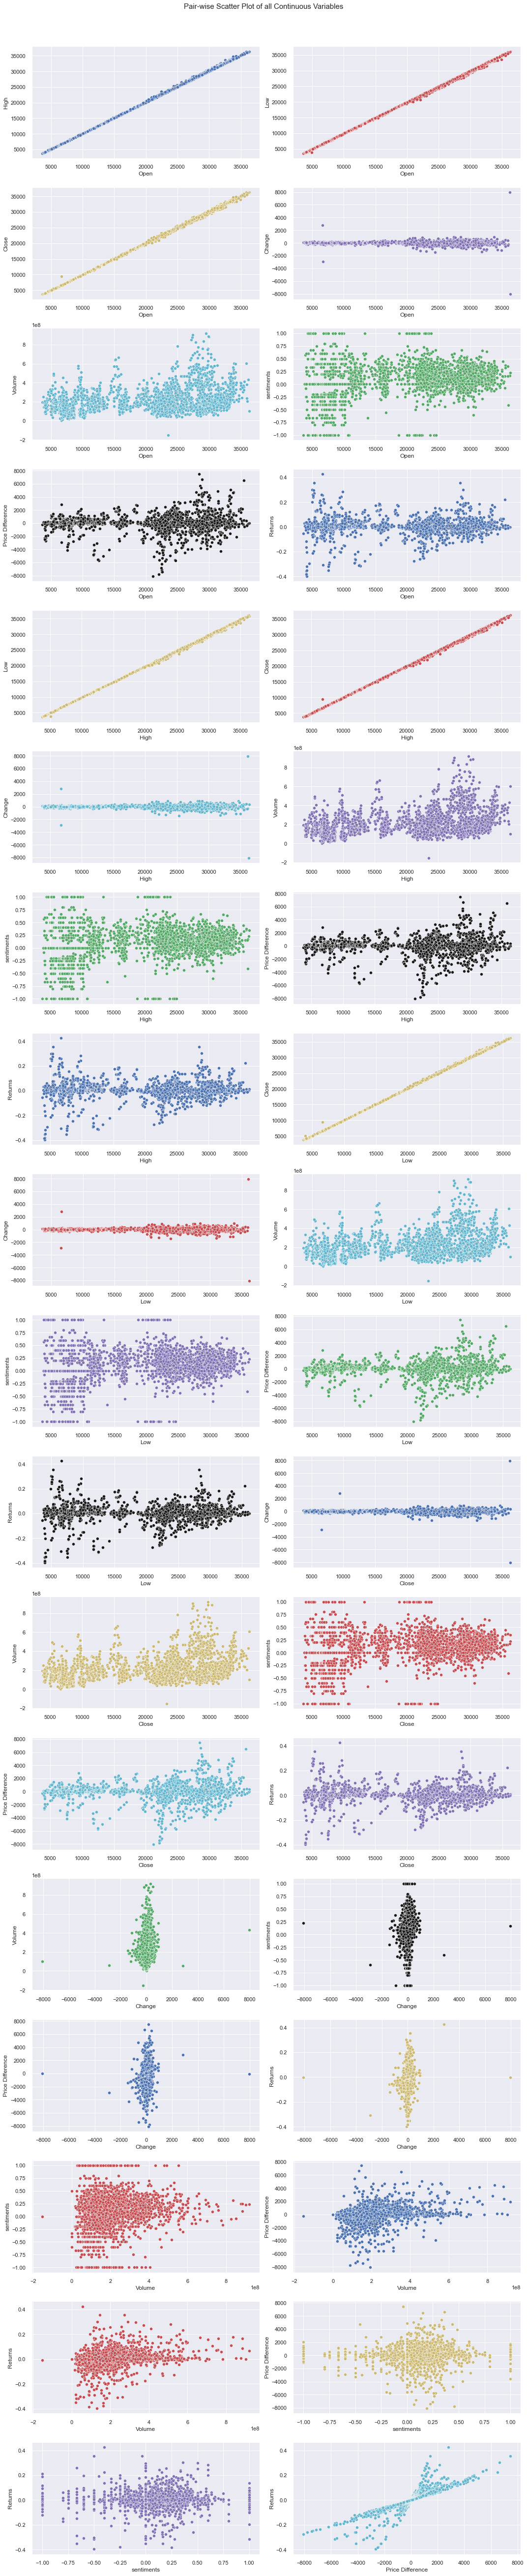

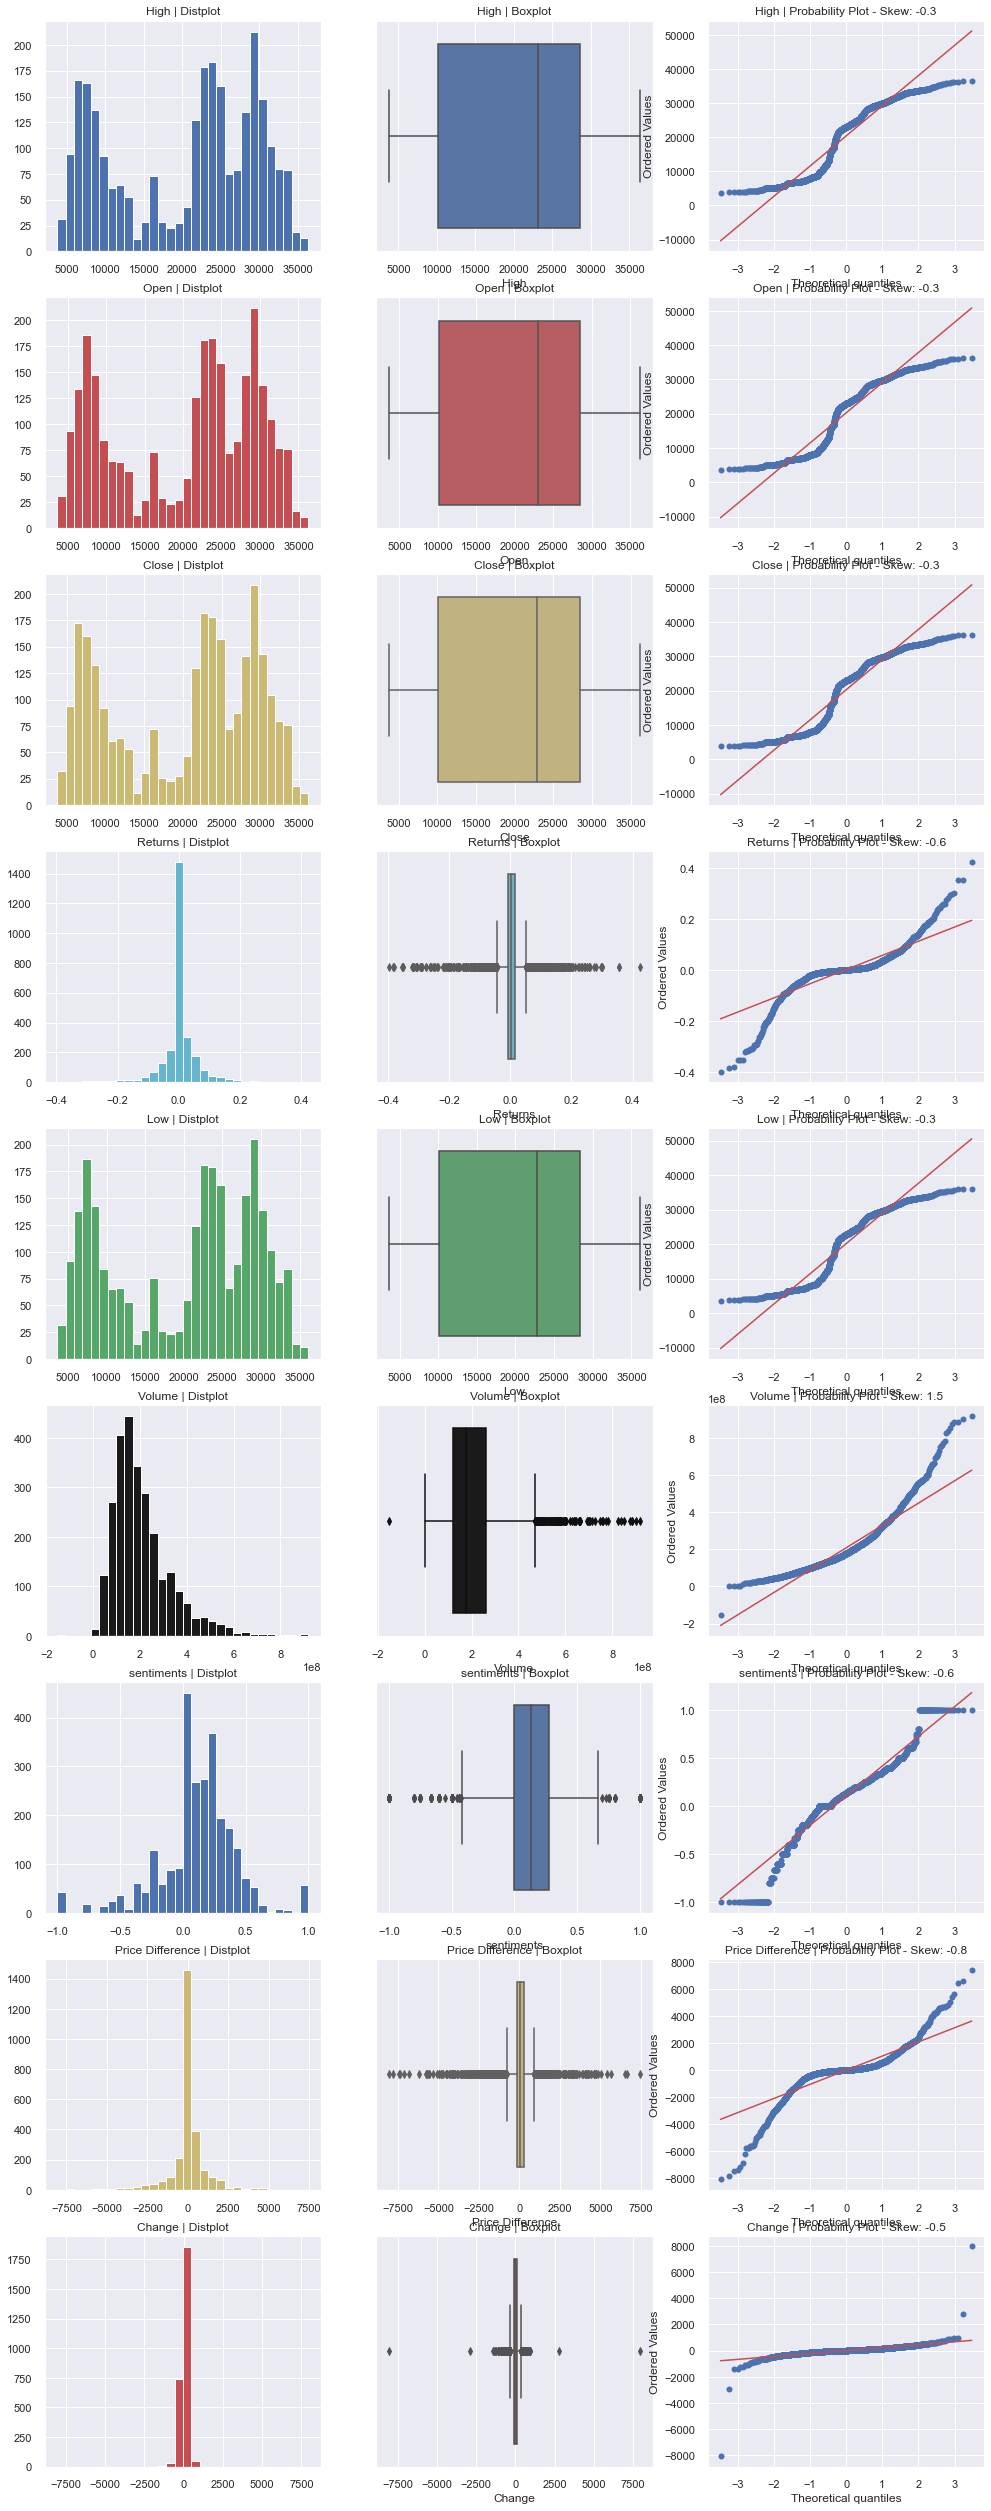

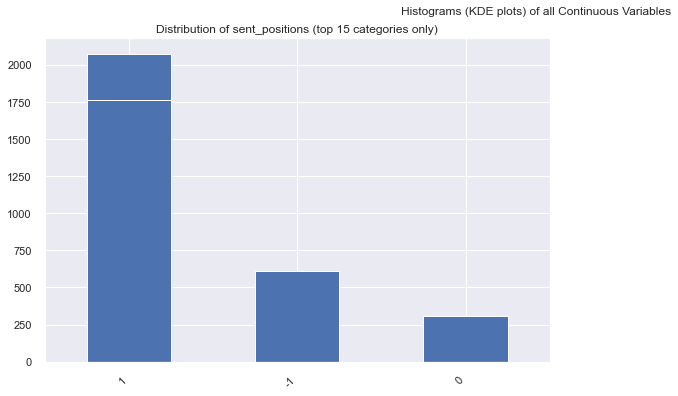

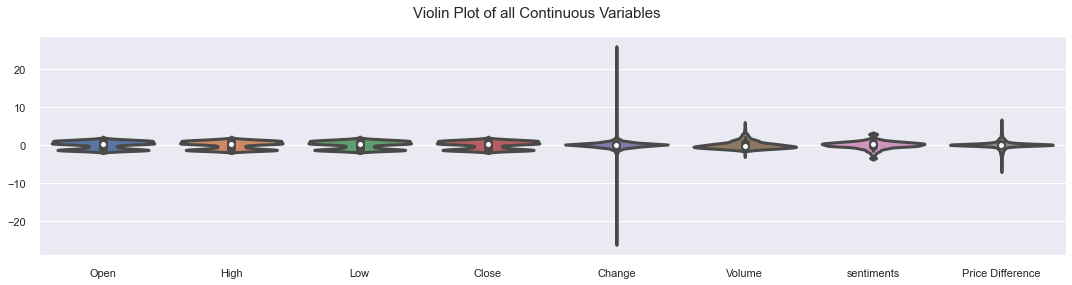

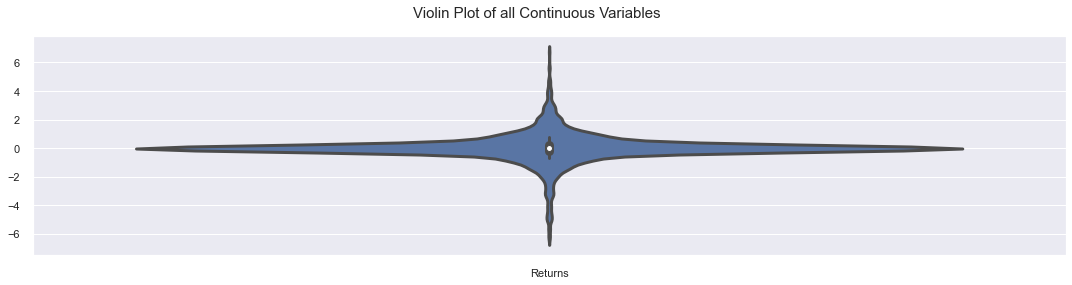

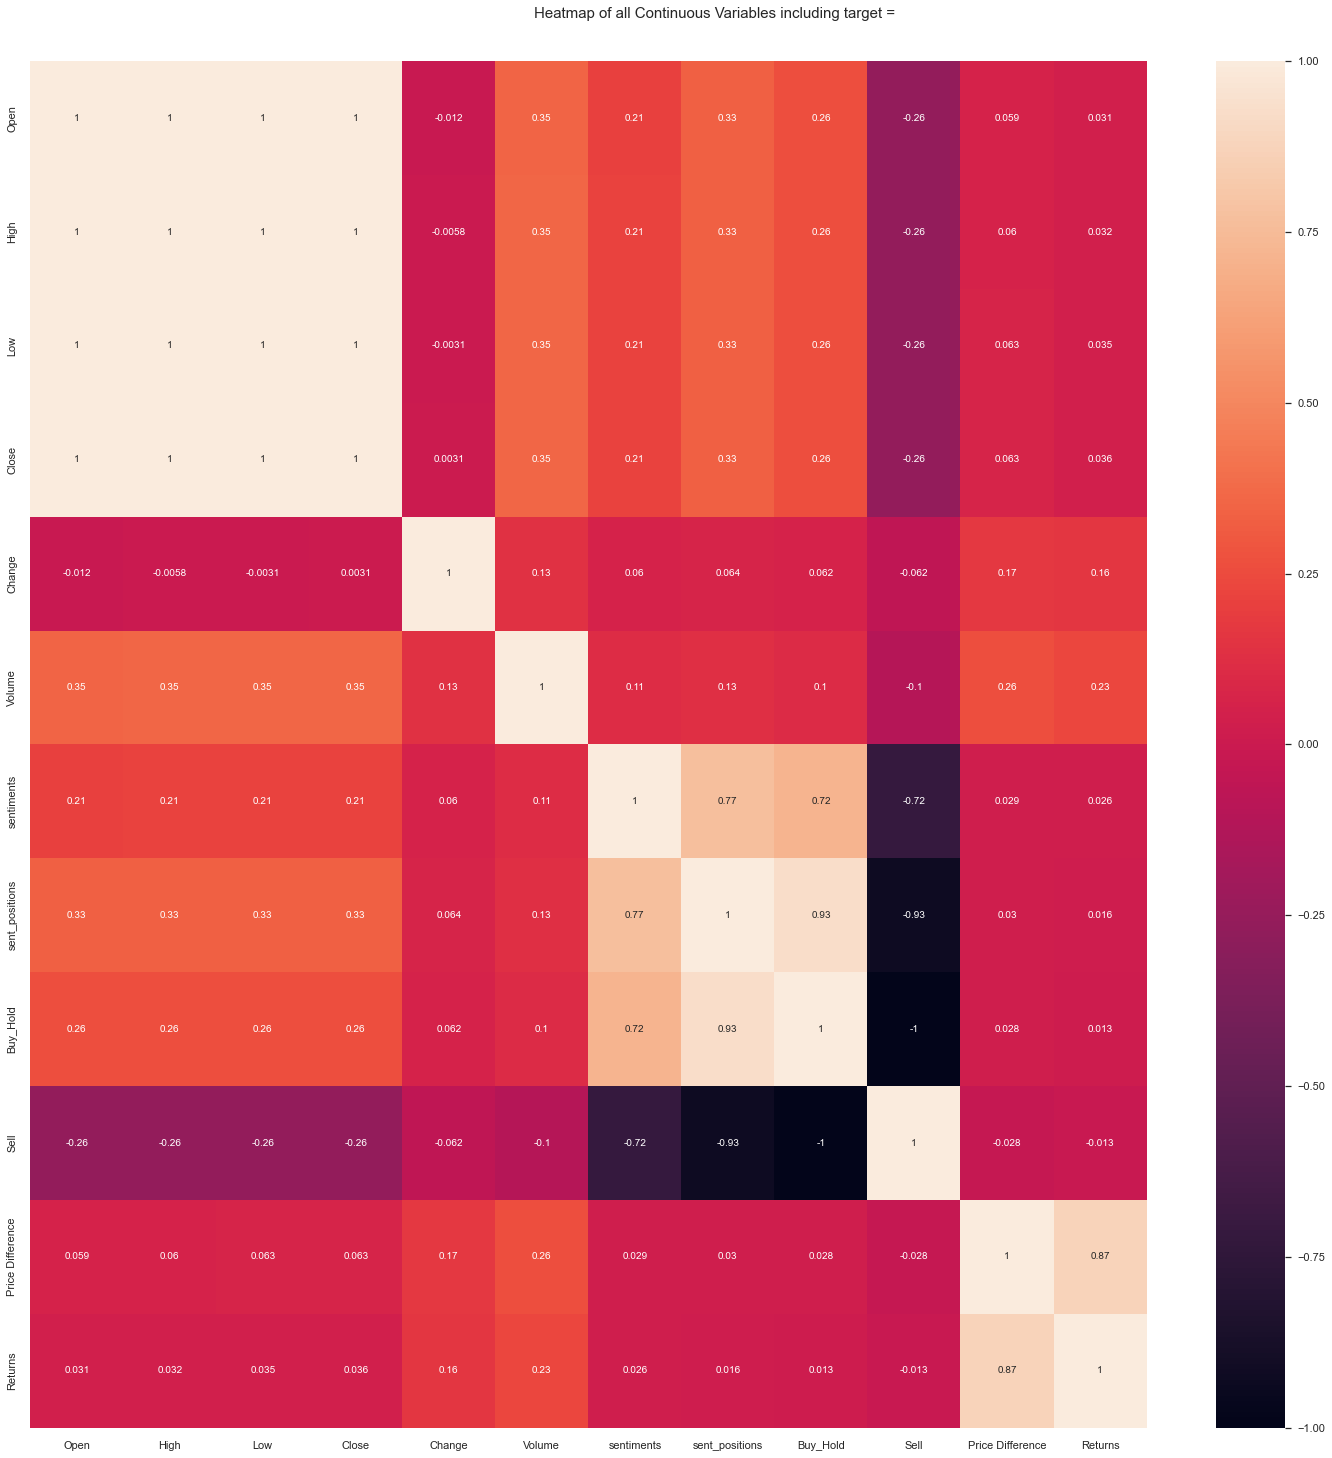

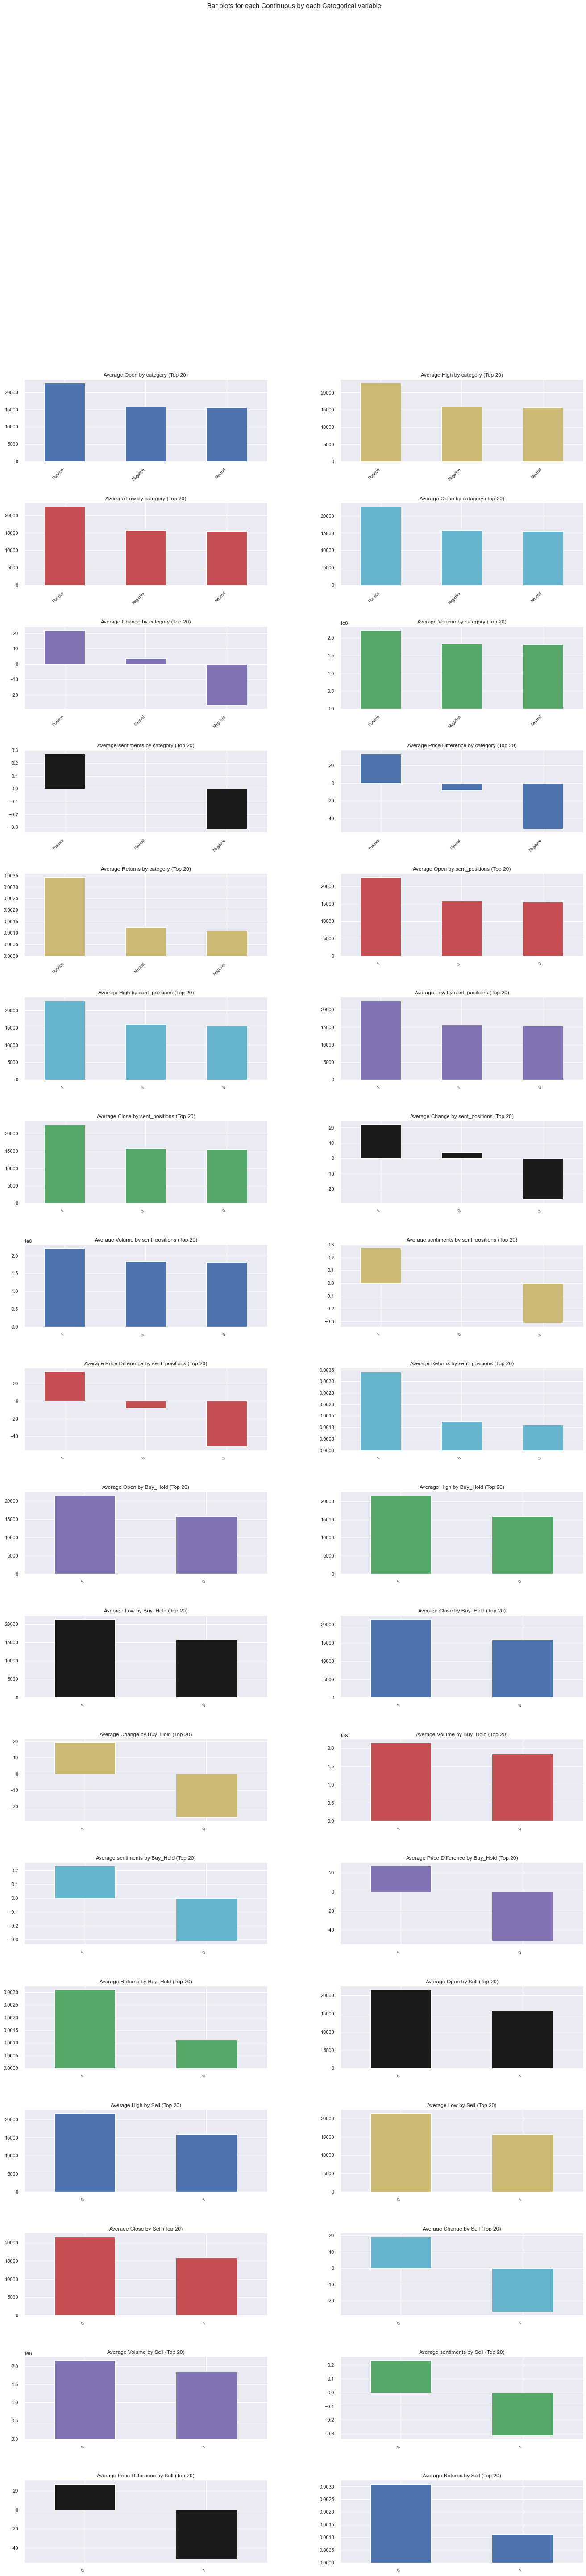

All Plots done
Time to run AutoViz = 15 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [74]:
filename1 = "roberta_stocks.csv"
sep = ","
dft = AV.AutoViz(
    filename1,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=5000,
    max_cols_analyzed=1000,
)

Shape of your Data Set loaded: (3221, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    7 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


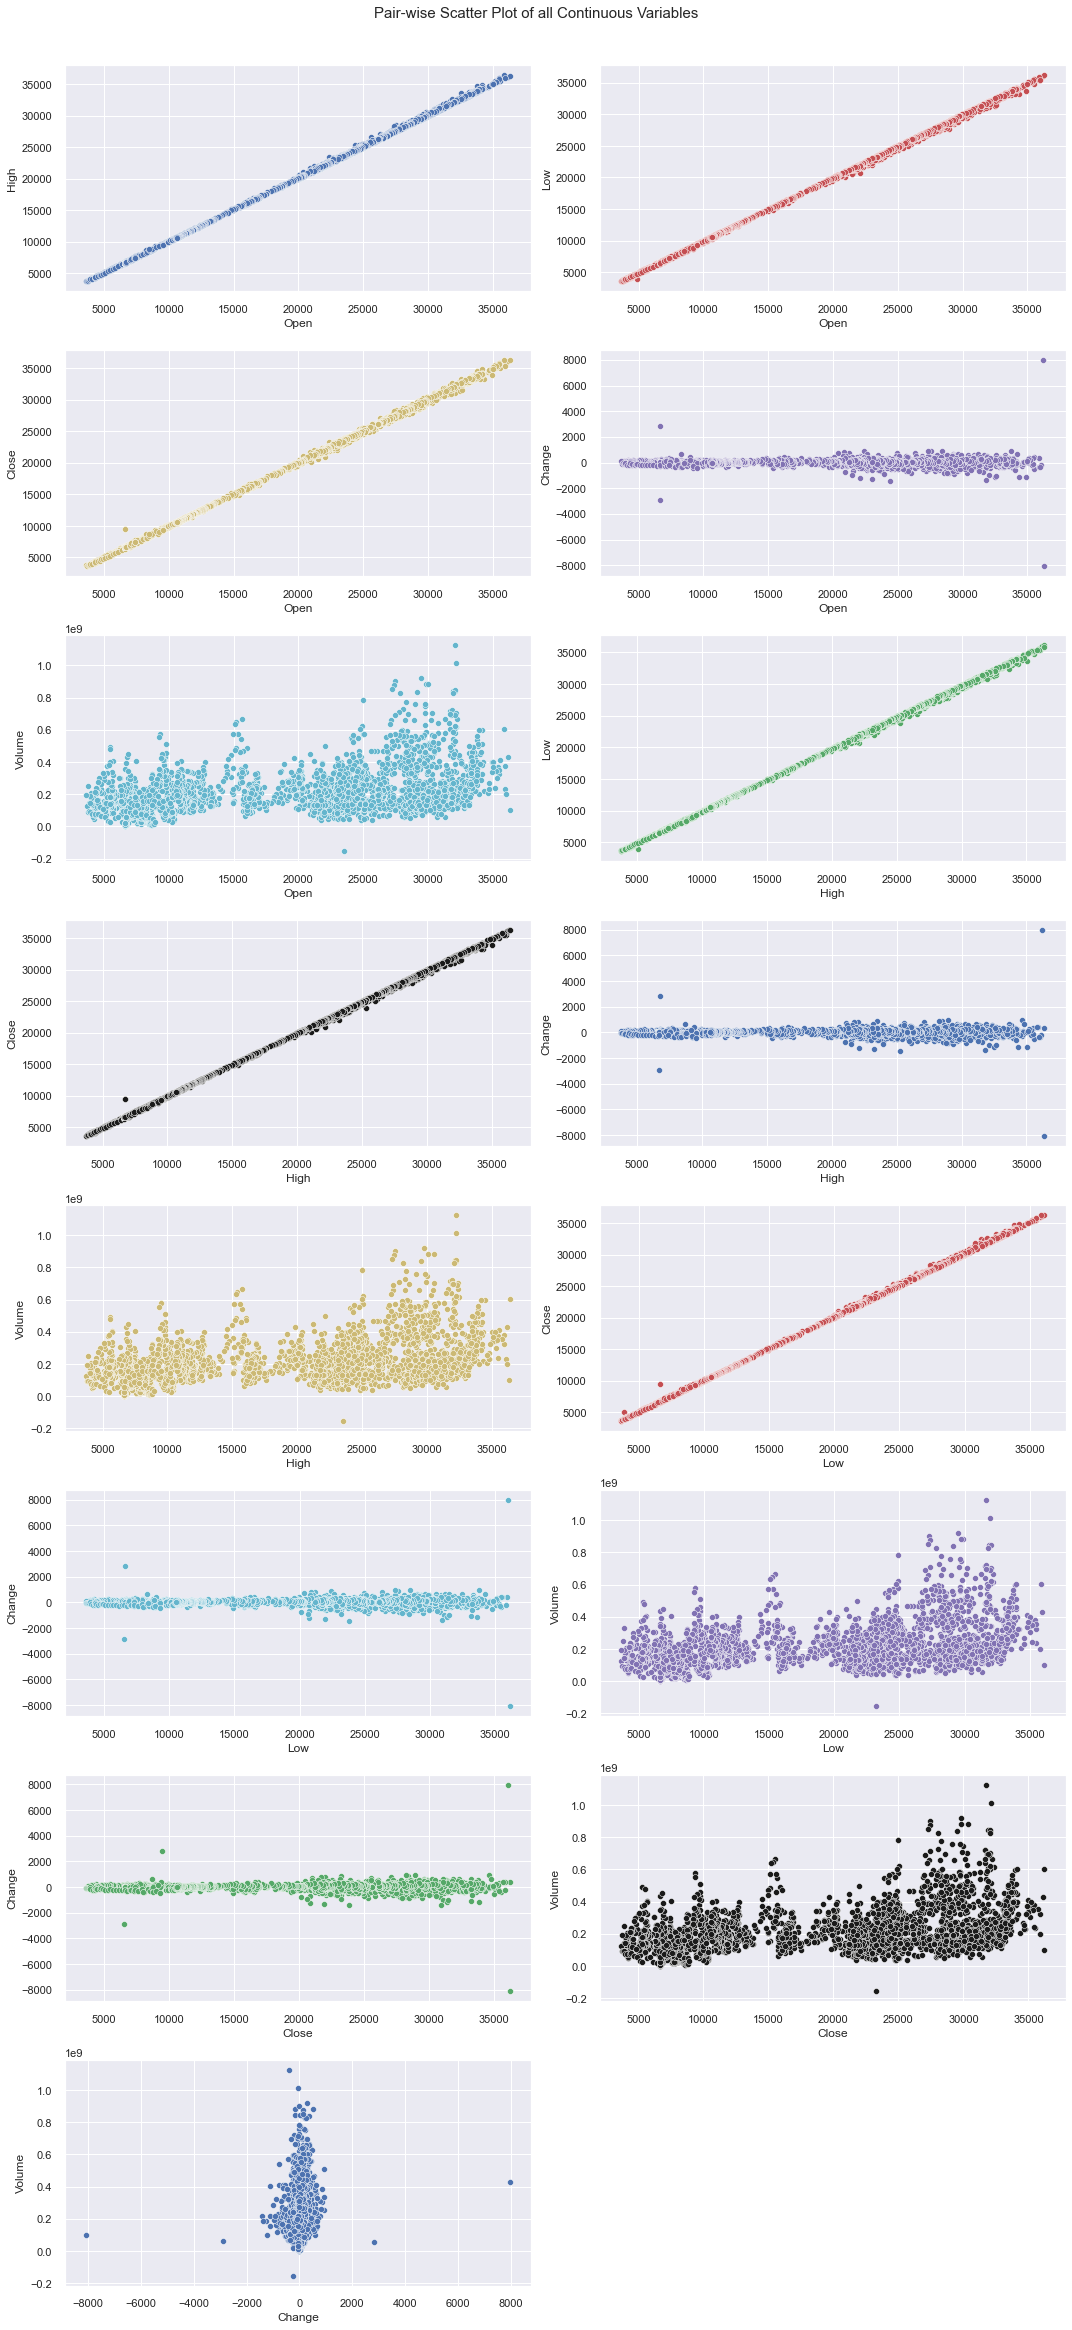

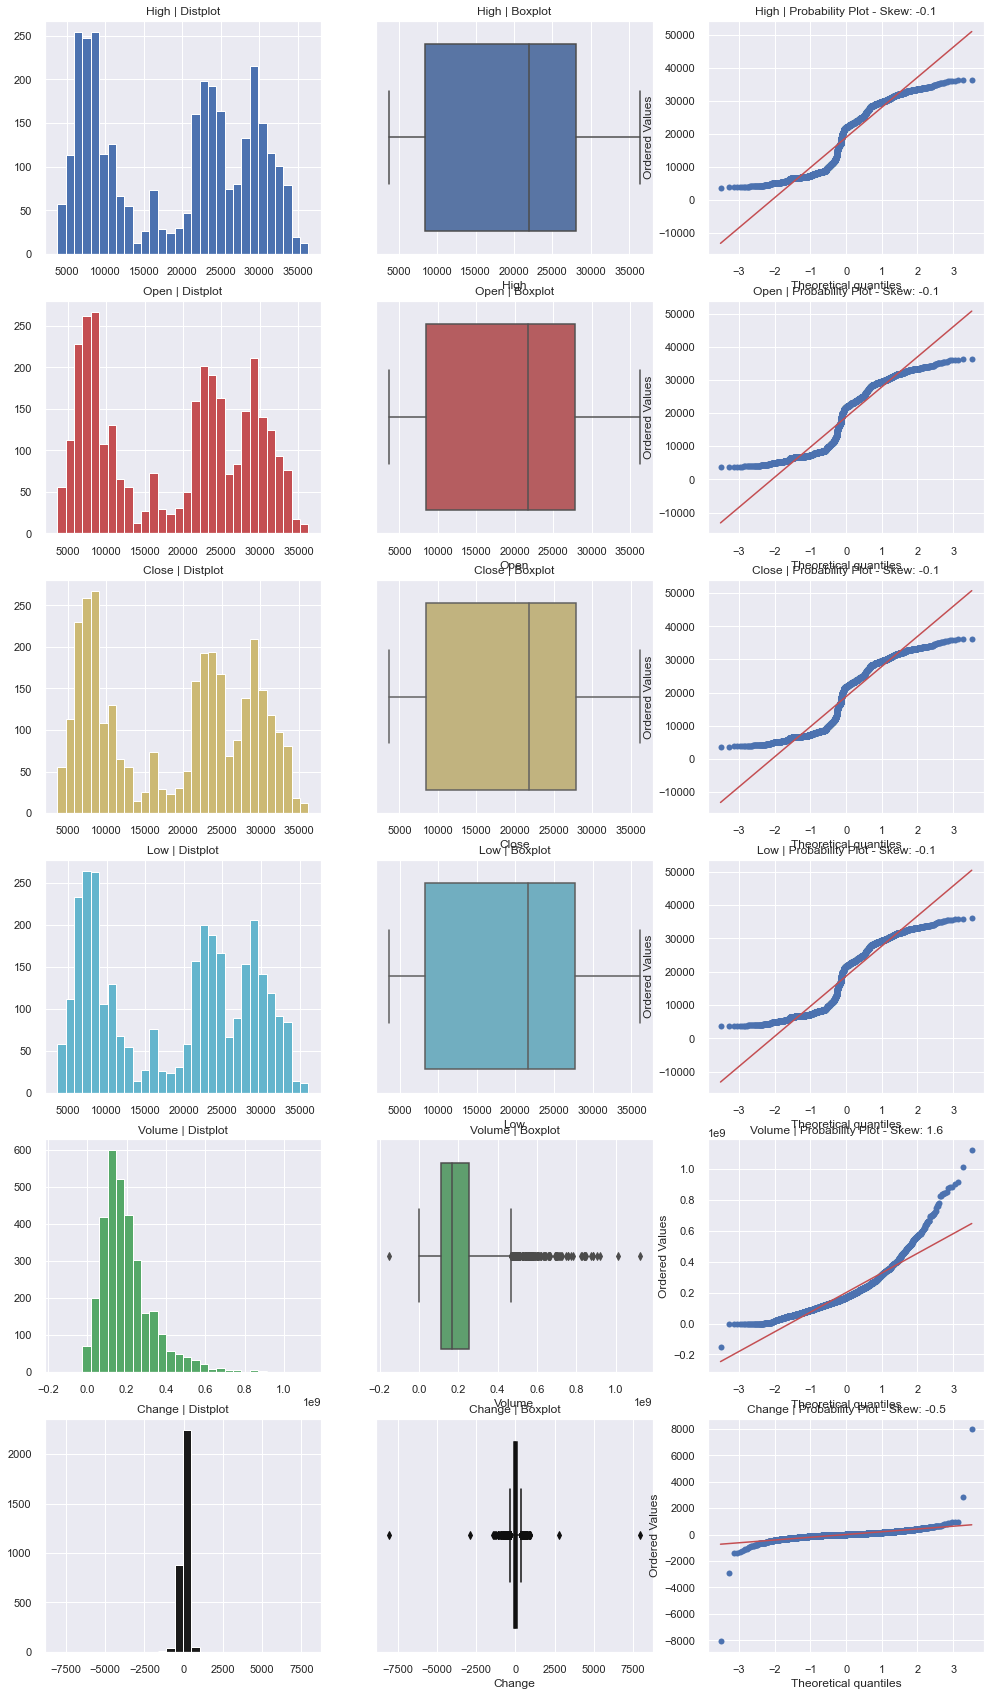

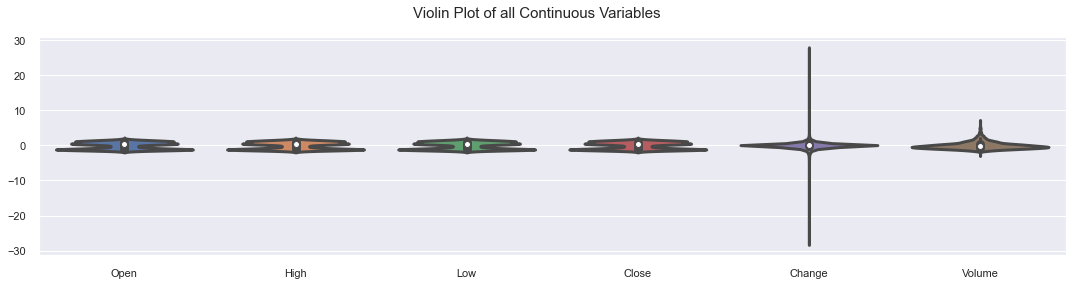

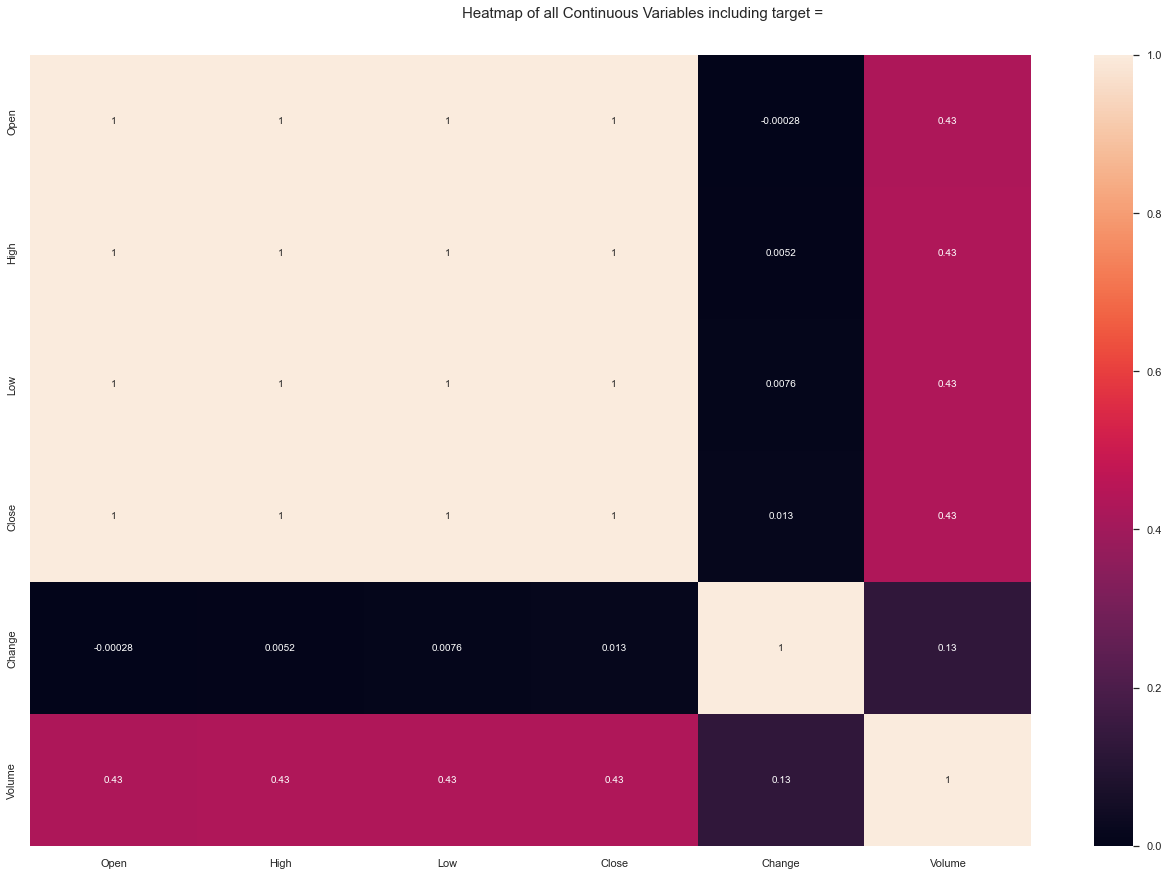

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [243]:
filename2= 'Stock Exchange KSE 100.csv'
sep = ","
dft = AV.AutoViz(
    filename2,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=5000,
    max_cols_analyzed=1000,
)

Shape of your Data Set loaded: (2687, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    14 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


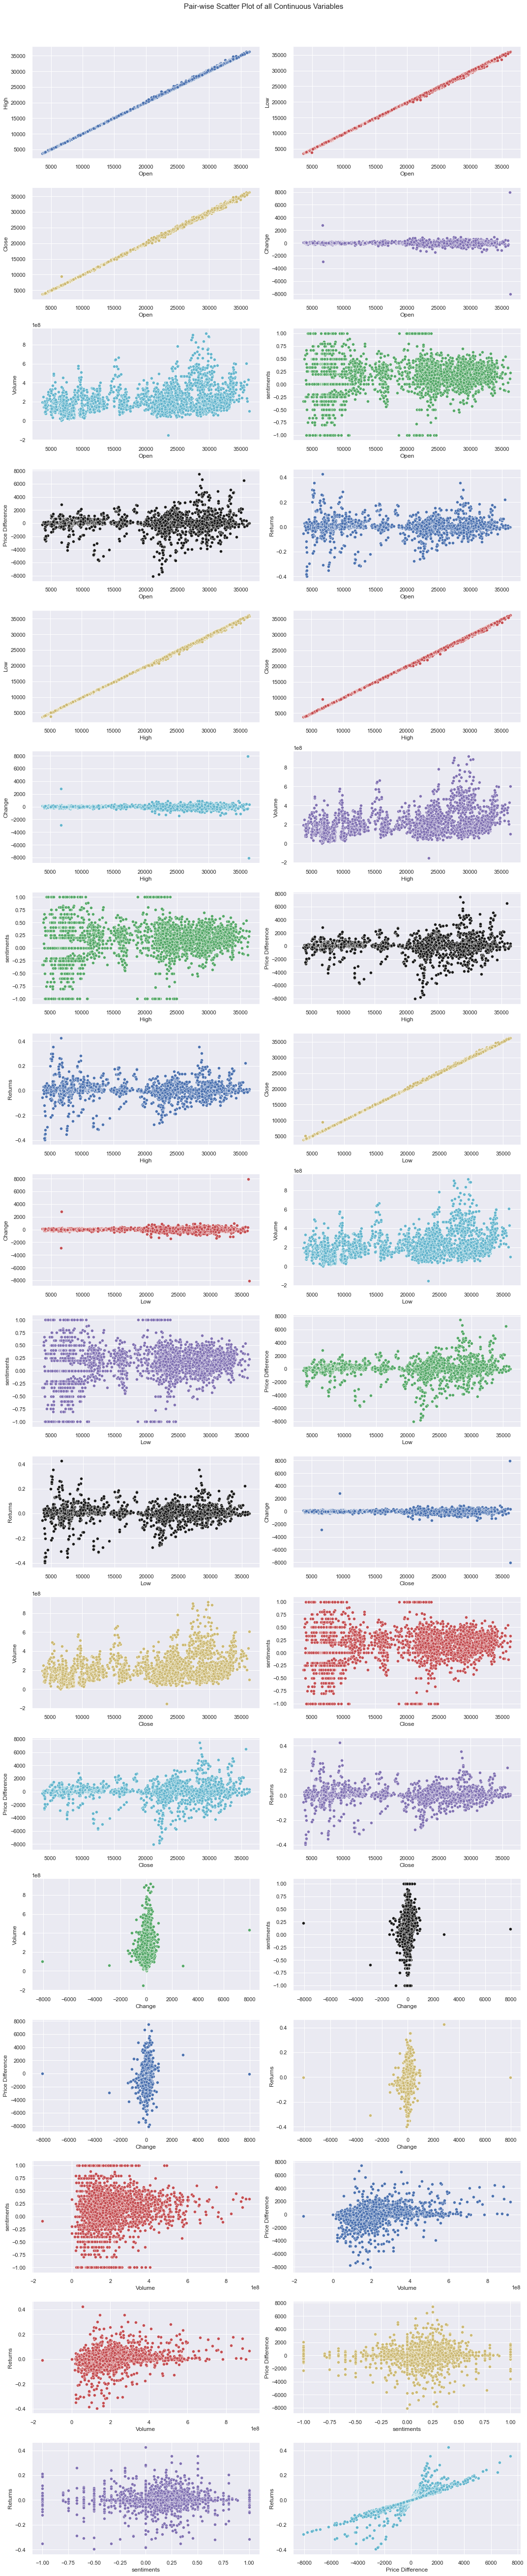

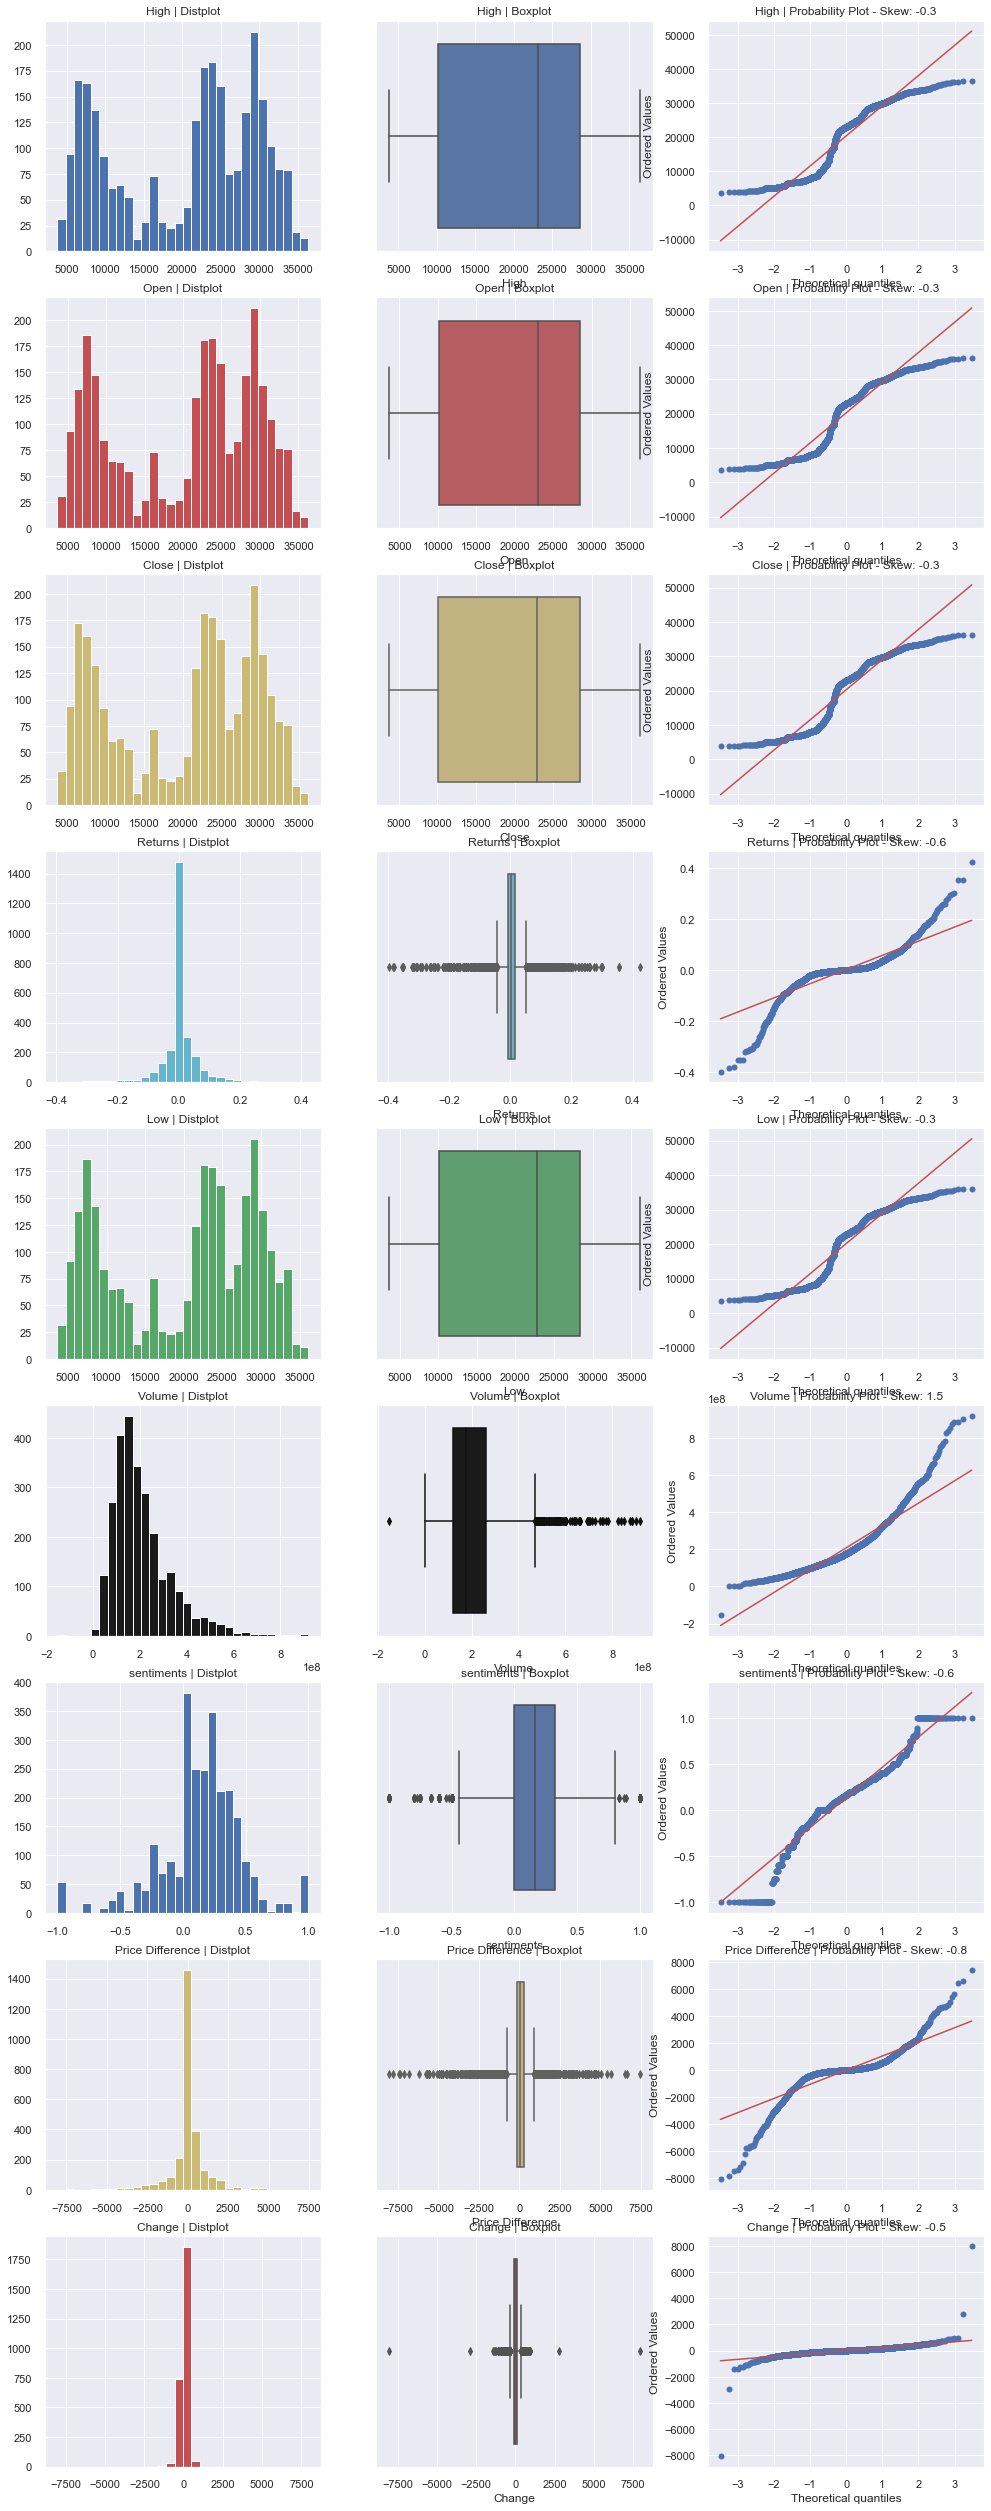

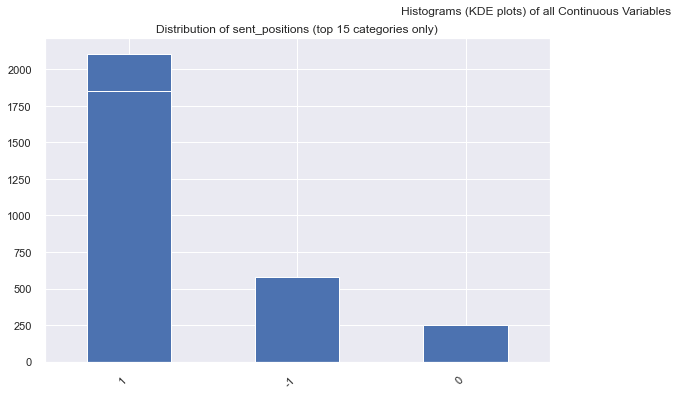

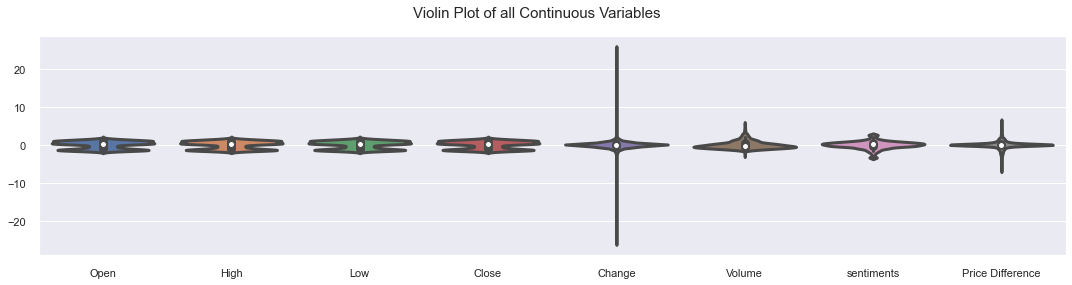

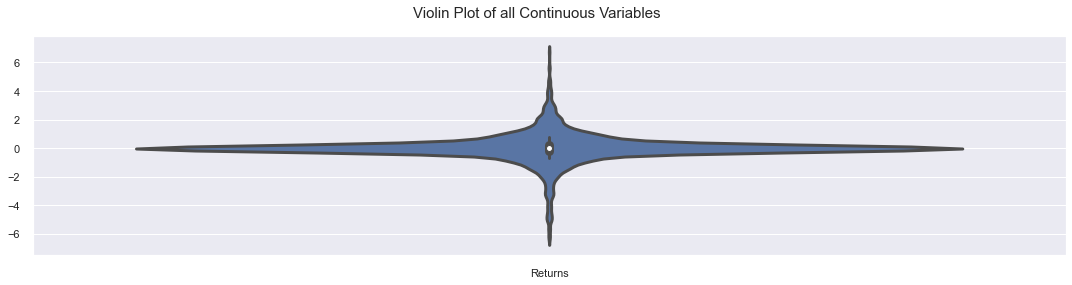

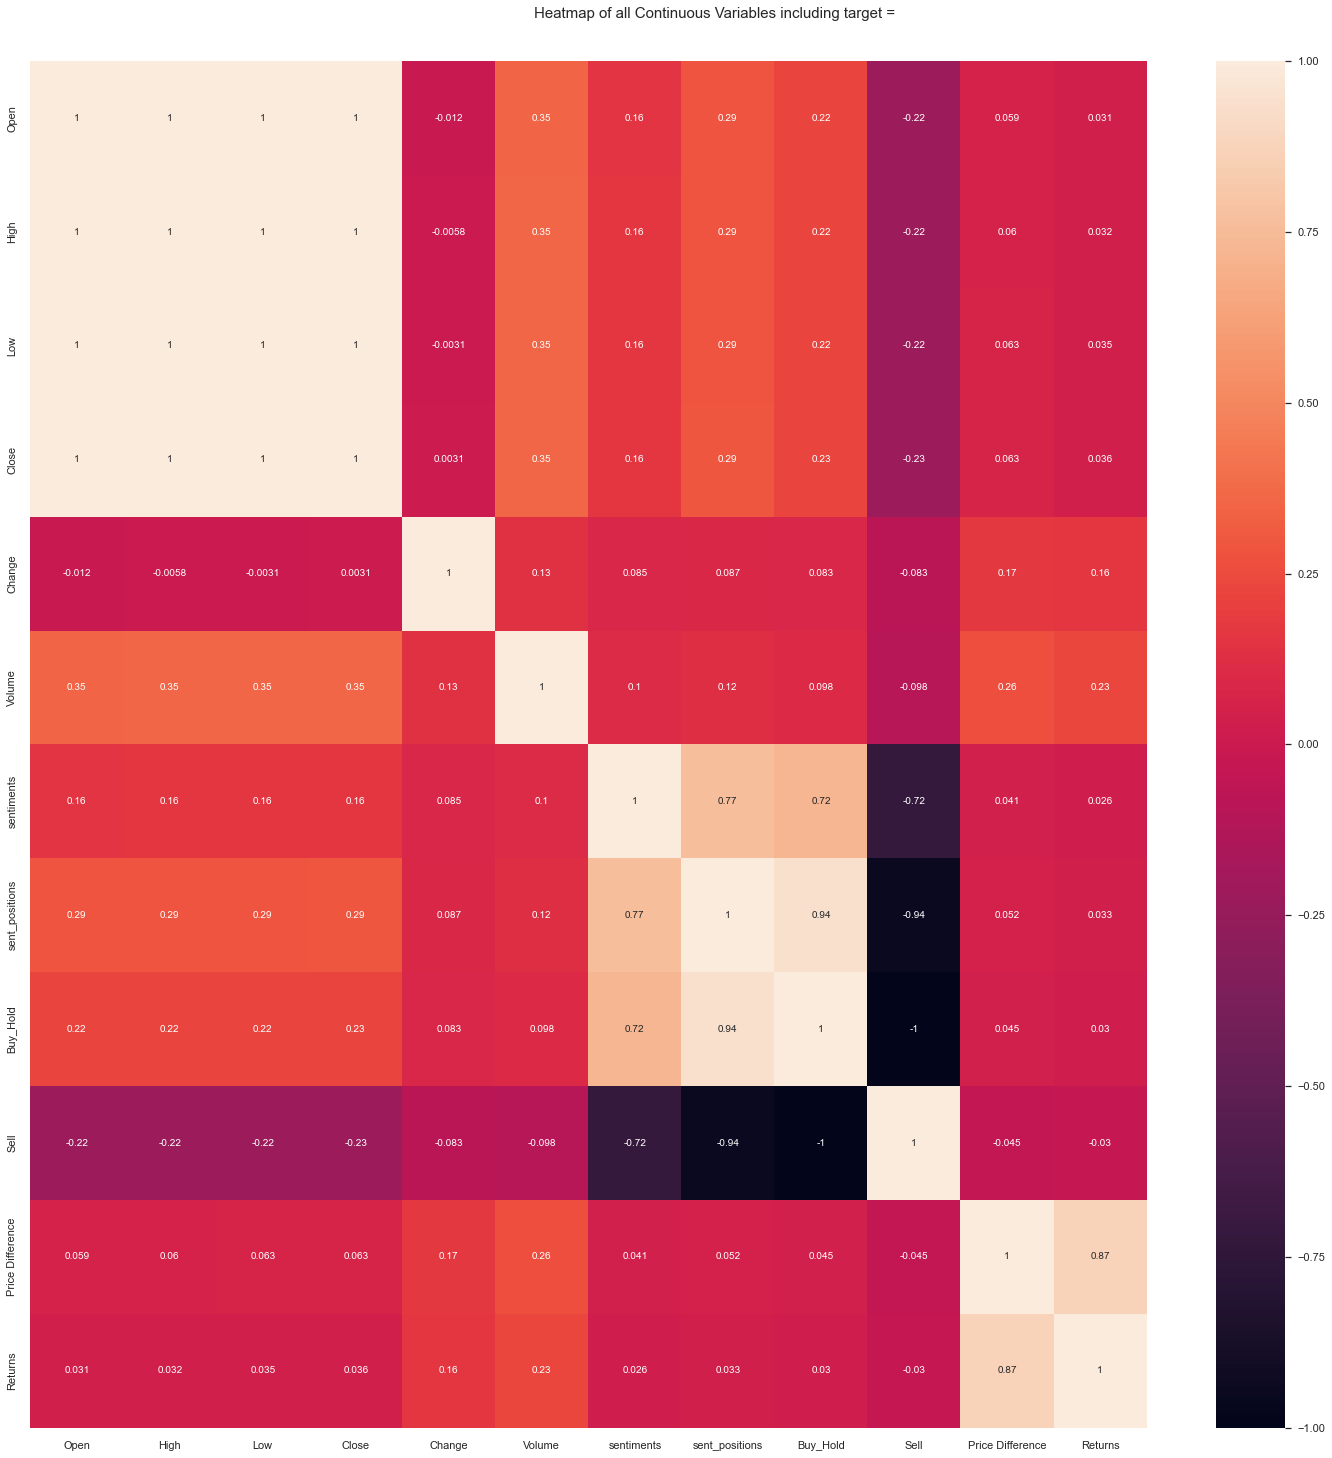

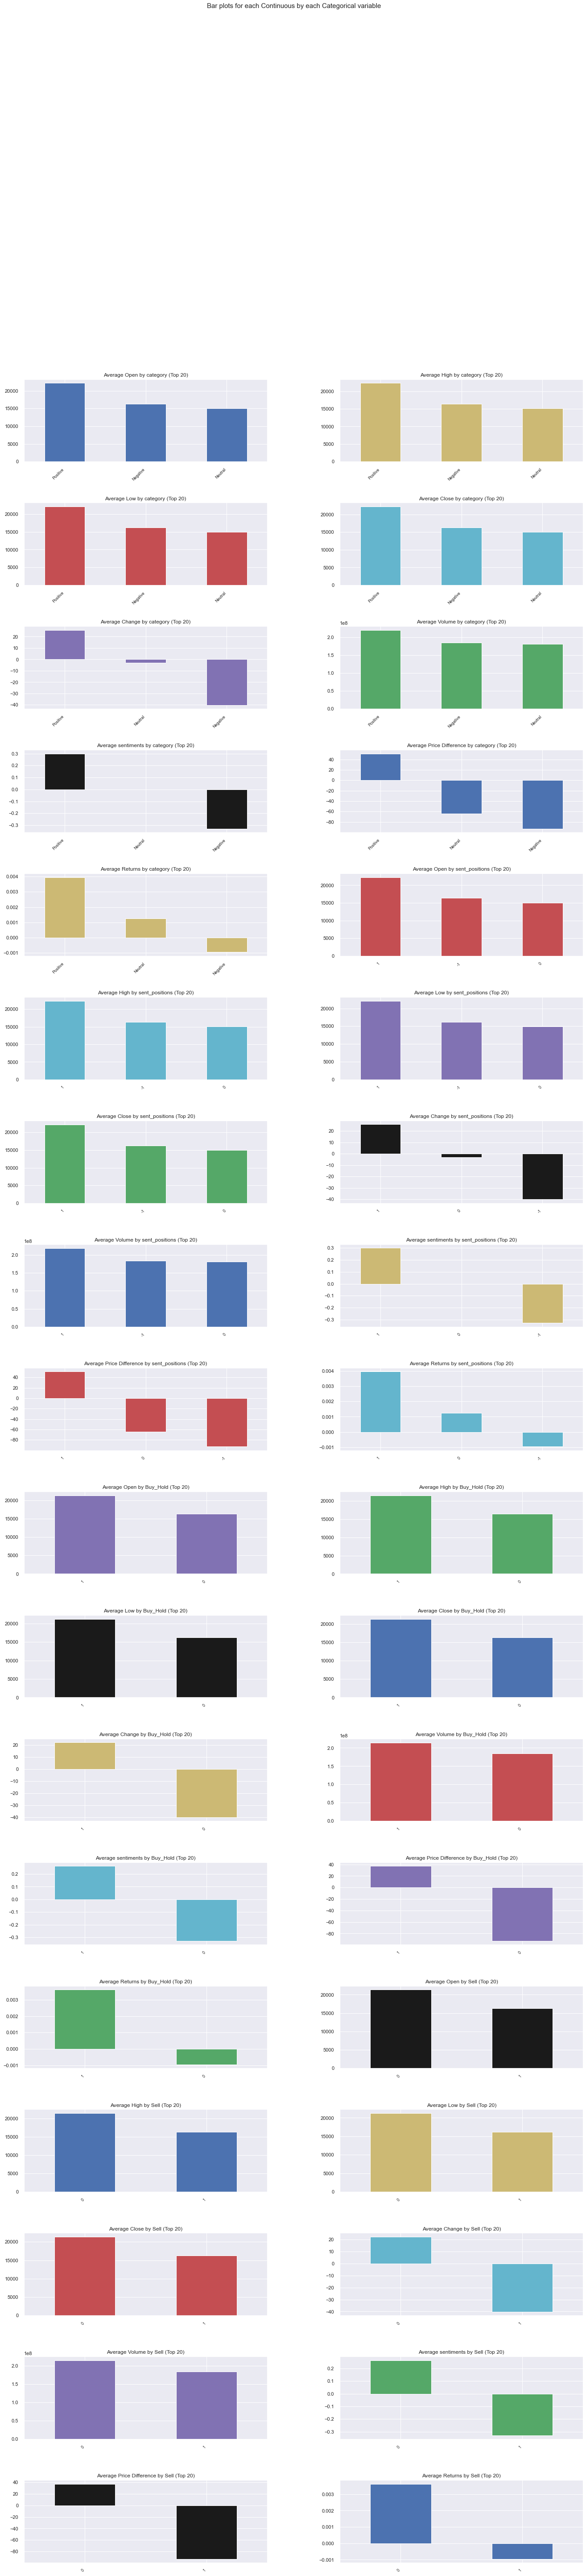

All Plots done
Time to run AutoViz = 13 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [75]:
filename = "bert_stocks.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=5000,
    max_cols_analyzed=1000,
)

In [60]:
bert_bt.to_csv('bert_bt.csv')

In [249]:
bert_bt.index.min(), bert_bt.index.max()

(Timestamp('2008-02-12 00:00:00'), Timestamp('2021-05-01 00:00:00'))

In [251]:
bert_bt

Open      High       Low     Close  Change       Volume  \
Date                                                                      
2008-02-12   6641.67   6641.79   6641.67   6641.75    0.06     197300.0   
2008-03-12   6641.74   6641.84   6641.44   6641.80    0.05      41200.0   
2008-05-12   6641.68   6641.75   6641.18   6641.75    0.07      41700.0   
2008-12-12   6641.68   6641.78   6641.65   6641.77    0.02      56000.0   
2008-12-15   6638.75   6638.75   6389.69   6389.69 -252.08   17890248.0   
...              ...       ...       ...       ...     ...          ...   
2020-12-28  30471.63  30657.47  30444.49  30601.75  157.26  463381581.0   
2020-12-30  30442.90  30777.53  30424.10  30733.89  309.79  455962479.0   
2020-12-31  30792.39  30845.66  30694.60  30779.70   45.81  578245258.0   
2021-01-01  30790.22  31455.60  30779.70  31169.49  389.79  642577537.0   
2021-05-01  31290.06  31327.52  31152.75  31266.16  -15.86  582082375.0   

            sentiments  sent_positions  
Date                                    
2008-02-12   -0.200000              -1  
2008-03-12    0.333333               1  
2008-05-12   -0.200000              -1  
2008-12-12   -0.333333              -1  
2008-12-15   -0.200000              -1  
...                ...             ...  
2020-12-28    0.000000               0  
2020-12-30    0.111111               1  
2020-12-31    0.076923               1  
2021-01-01    0.285714               1  
2021-05-01   -0.153846              -1  

[2687 rows x 8 columns]

In [61]:
roberta_bt.to_csv('roberta_bt.csv')